In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import autorootcwd
import os
import json
import pandas as pd

In [3]:
DIR = 'results/pitch_shifts'
experiments = os.listdir(DIR)

rows = []
errored = []

for experiment in experiments:
    with open(f'{DIR}/{experiment}/metadata.json') as f:
        args = json.load(f)
    args = args['args']
    if args['cqt_pitch_shift'] and args['audio_pitch_shift']:
        shift_type = 'cqt+audio'
    elif args['cqt_pitch_shift']:
        shift_type = 'cqt'
    elif args['audio_pitch_shift']:
        shift_type = 'audio'
    else:
        raise ValueError(f'Neither cqt nor audio pitch shift found in {experiment}')
    
    shift_prob = args['aug_shift_prob']

    with open(f'{DIR}/{experiment}/val_metrics.json') as f:
        data = json.load(f)
    rows.append({
        'shift_type': shift_type,
        'shift_prob': shift_prob,
        'accuracy': data['mean']['acc'],
        'root': data['mean']['root'],
        'majmin': data['mean']['majmin'],
        'third': data['mean']['third'],
        'seventh': data['mean']['seventh'],
        'mirex': data['mean']['mirex'],
        'class_wise_acc_mean': data['class_wise']['acc']['mean'],
        'class_wise_acc_median': data['class_wise']['acc']['median'],
    })


df = pd.DataFrame(rows)

In [4]:
df.sort_values(by=['shift_type', 'shift_prob'], inplace=True)
df

,shift_type,shift_prob,accuracy,root,majmin,third,seventh,mirex,class_wise_acc_mean,class_wise_acc_median
29,audio,0.0,61.216686,80.144684,77.803411,77.139960,63.482241,79.570927,19.111148,1.138856
24,audio,0.1,61.583678,80.165670,77.826616,77.126053,63.863655,80.602910,19.499747,1.249952
9,audio,0.2,62.015368,81.114980,78.599098,77.981117,64.296039,80.230608,20.311258,3.582948
13,audio,0.3,62.115875,81.009992,78.412675,77.770822,64.428828,80.676807,20.310243,5.689928
14,audio,0.4,62.389684,81.447994,78.789453,78.129928,64.676779,80.306492,21.091901,5.168206
8,audio,0.5,62.358370,81.546828,78.878634,78.263569,64.633511,80.980397,20.757827,5.064215
25,audio,0.6,62.714337,81.738574,79.251311,78.591183,65.040013,80.965072,20.680414,4.425767
28,audio,0.7,63.143403,82.023526,79.379162,78.749555,65.392801,80.873268,22.426452,9.160804
23,audio,0.8,62.984432,81.576423,79.243004,78.593991,65.258413,81.034870,21.788476,6.928880
30,audio,0.9,63.171144,81.763156,79.232579,78.573364,65.481113,81.038059,21.835072,7.266653


In [5]:
df = df[df['shift_type'] != 'cqt+audio']

In [6]:
# Capitalise cqt to CQT
df['shift_type'] = df['shift_type'].replace({'cqt': 'CQT'})

/var/folders/wv/rkgyh65d1jx0nzbn07gn8f380000gn/T/ipykernel_85796/2169936486.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['shift_type'] = df['shift_type'].replace({'cqt': 'CQT'})


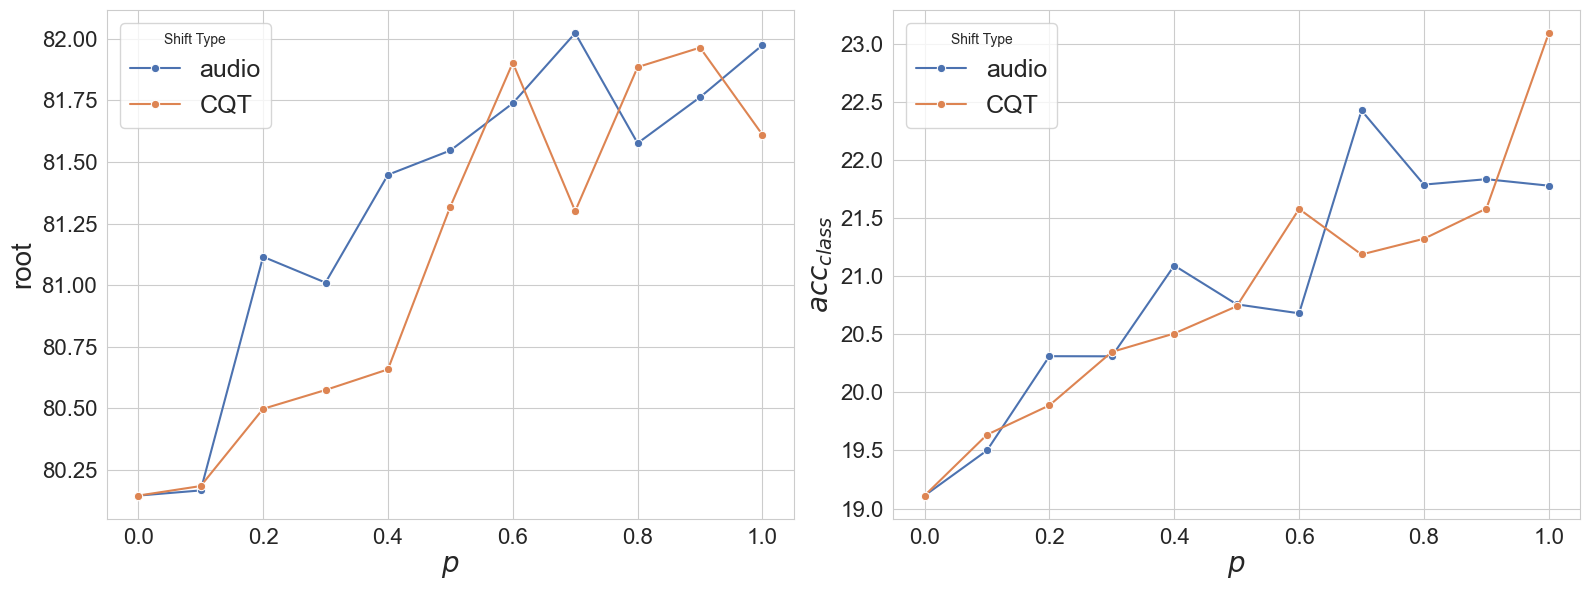

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("deep")

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot the 'root' metric on the left subplot
sns.lineplot(data=df, x='shift_prob', y='root', hue='shift_type', marker='o', ax=ax1)
# ax1.set_title('Root Accuracy vs Pitch Shift Probability')
ax1.legend(title='Shift Type')

# Plot the 'class_wise_acc_mean' metric on the right subplot
sns.lineplot(data=df, x='shift_prob', y='class_wise_acc_mean', hue='shift_type', marker='o', ax=ax2)
# ax2.set_title('Class-wise Mean Accuracy vs Pitch Shift Probability')
ax2.set_xlabel('Pitch Shift Probability')
ax2.set_ylabel('Class-wise Mean Accuracy')
ax2.legend(title='Shift Type')

fticksize = 16

# Increase font size for better readability
plt.setp(ax1.xaxis.get_majorticklabels(), fontsize=fticksize)
plt.setp(ax1.yaxis.get_majorticklabels(), fontsize=fticksize)
plt.setp(ax2.xaxis.get_majorticklabels(), fontsize=fticksize)
plt.setp(ax2.yaxis.get_majorticklabels(), fontsize=fticksize)

fsize = 20
# axis titles
# ax1.set_title('root', fontsize=fsize)
ax1.set_xlabel('$p$', fontsize=fsize)
ax1.set_ylabel('root', fontsize=fsize)
# ax2.set_title('$acc_{class}$', fontsize=fsize)
ax2.set_xlabel('$p$', fontsize=fsize)
ax2.set_ylabel('$acc_{class}$', fontsize=fsize)

legend_fsize = 18
# Increase legend font size
ax1.legend(title='Shift Type', fontsize=legend_fsize)
ax2.legend(title='Shift Type', fontsize=legend_fsize)

# Title larger 
# plt.suptitle('Effect of Pitch Shift Augmentation on Model Performance', fontsize=16)
# Adjust layout to prevent overlap
plt.subplots_adjust(top=0.85)
plt.tight_layout()
plt.savefig('thesis/figures/pitch_shift_analysis.png', dpi=300, bbox_inches='tight')
plt.show()